### Time Series Analysis for Various Parameters

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

# Mean Absolute Scaled Error (the smaller the better)
def mase(forecast, actual):
    forecast = np.array(forecast)
    actual = np.array(actual)
    
    # Calculate Mean Absolute Error (MAE)
    mae = np.mean(np.abs(forecast - actual))
    
    # Calculate mean absolute difference between consecutive actual values
    diff = np.diff(actual)
    mean_abs_diff = np.mean(np.abs(diff))
    
    # Calculate MASE
    mase_score = mae / mean_abs_diff
    
    return round(mase_score, 3)


def perform_analysis(file):
    df = pd.read_csv(file)

    # Get the column names
    month = str(df.columns[0])
    value = str(df.columns[1])

    # Convert Month column to time object
    df[month] = pd.to_datetime(df[month])

    df = df.set_index([month])

    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df[value], marker='o', linestyle='-')
    plt.title(f'{value} over Time for All Devices')
    plt.xlabel(month)
    plt.ylabel(value)
    plt.grid(True)

    try:
        # Find the best parameter values for the ARIMA model using auto_arima
        stepwise_fit = auto_arima(df[value], seasonal=True, m=12, trace=True)
    except:
        predictionGraph = None
        result_error = None
    else:
        # Test-train split
        X = df[value].values
        train_size = int(len(X) * 0.66)
        train, actual = X[:train_size], X[train_size:]

        history = train.tolist()
        predictions = []

        for time_step in range(len(actual)):
            current_model = SARIMAX(history, order=stepwise_fit.order, seasonal_order=stepwise_fit.seasonal_order)
            current_model_fit = current_model.fit(disp=False)
            current_output = current_model_fit.forecast()
            predicted_value = current_output[0]
            predictions.append(predicted_value)
            true_value = actual[time_step]
            history.append(true_value)

        # Error rate for time series - MASE (Mean Absolute Scaled Error)
        result_error = mase(actual, predictions)
        print(f"MASE: {result_error}")

        final_model = SARIMAX(df[value], order=stepwise_fit.order, seasonal_order=stepwise_fit.seasonal_order).fit(disp=False)

        # Number of months to predict
        number_of_months_to_predict = 12
        prediction = final_model.predict(start=len(df), end=len(df) + number_of_months_to_predict - 1, dynamic=False)

        # Plotting
        plt.figure(figsize=(10, 6))
        plt.plot(df.index, df[value], label='Train')
        plt.plot(prediction.index, prediction, label='Prediction')
        plt.title(f'{value} Forecast with SARIMA')
        plt.xlabel(month)
        plt.ylabel(value)
        plt.legend()
        plt.grid(True)
        plt.show()


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=1392.322, Time=0.55 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1401.201, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1390.108, Time=0.15 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1387.612, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1421.776, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=1401.168, Time=0.04 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=1388.686, Time=0.25 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=1389.043, Time=0.42 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=1390.458, Time=0.12 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=1390.535, Time=0.63 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=1389.878, Time=0.10 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=1388.585, Time=0.20 sec
 ARIMA(0,0,2)(0,0,1)[12] intercept   : AIC=1388.822, Time=0.18 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=1386.977, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


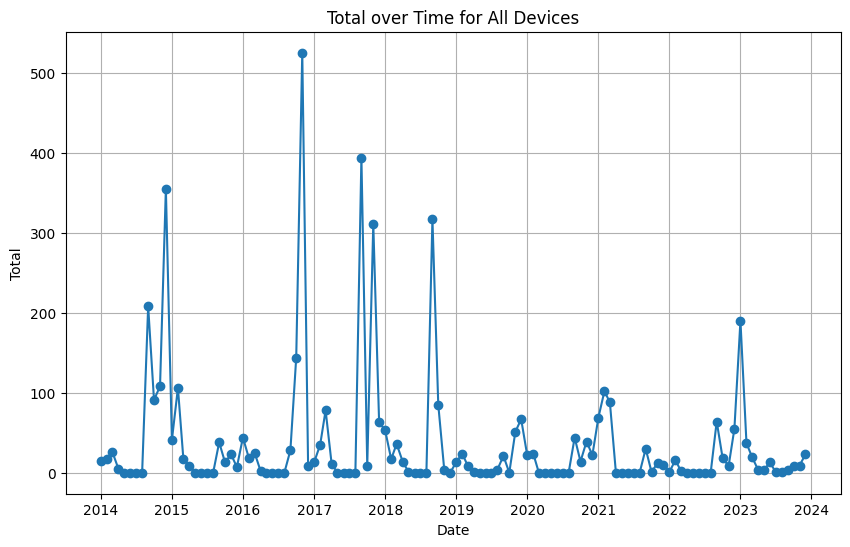

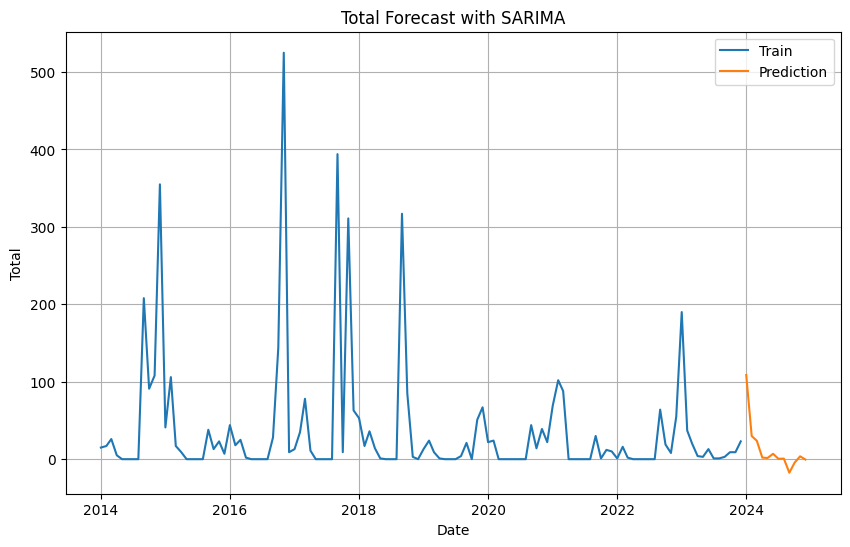

In [14]:
perform_analysis("data_summary.csv")

In [16]:
import pandas
mwd_df = pandas.read_csv("mean_wave_direction.csv")
mwd_df

,date,mean_value
0,2023-11-30,133.700000
1,2023-12-01,211.204167
2,2023-12-02,244.170833
3,2023-12-03,247.983333
4,2023-12-04,109.320833
...,...,...
179,2024-05-27,64.579167
180,2024-05-28,120.375000
181,2024-05-29,270.504167
182,2024-05-30,157.470833


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=2061.756, Time=0.61 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2153.579, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=2059.179, Time=0.24 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=2078.086, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2459.802, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=2060.529, Time=0.01 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=2059.224, Time=0.48 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=2060.023, Time=0.35 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=2059.780, Time=0.11 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=2061.216, Time=0.54 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=2152.256, Time=0.14 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=2056.513, Time=0.40 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=2056.925, Time=0.02 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=2056.833, Time=0.71 sec
 ARIMA(2,0,0)(1,0,1

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


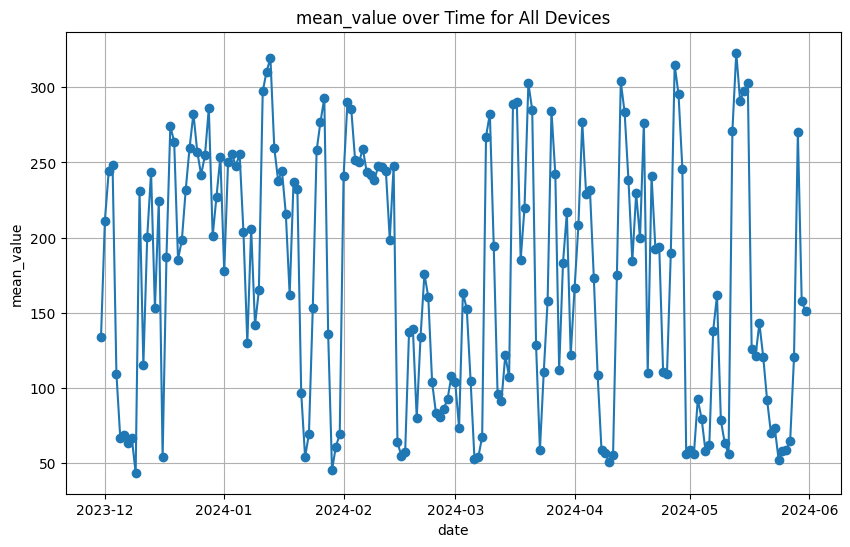

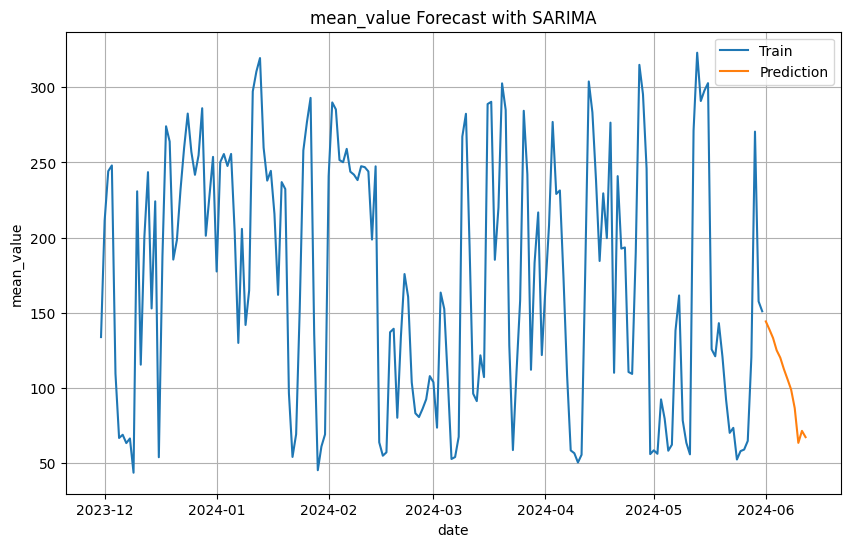

In [17]:
perform_analysis("mean_wave_direction.csv")

---------------------------------------------------------------

### Another Arima Model

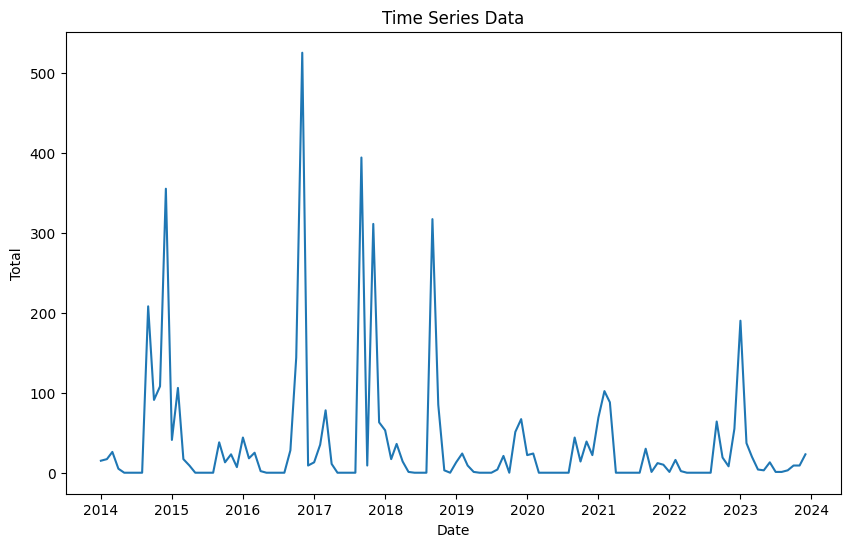

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=1132.195, Time=0.52 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1137.505, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1129.576, Time=0.15 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1126.361, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1154.500, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=1138.259, Time=0.04 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=1127.290, Time=0.26 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=1127.607, Time=0.32 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=1129.786, Time=0.10 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=1129.222, Time=0.53 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=1127.397, Time=0.08 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=1127.811, Time=0.18 sec
 ARIMA(0,0,2)(0,0,1)[12] intercept   : AIC=1127.913, Time=0.17 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=1125.996, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0

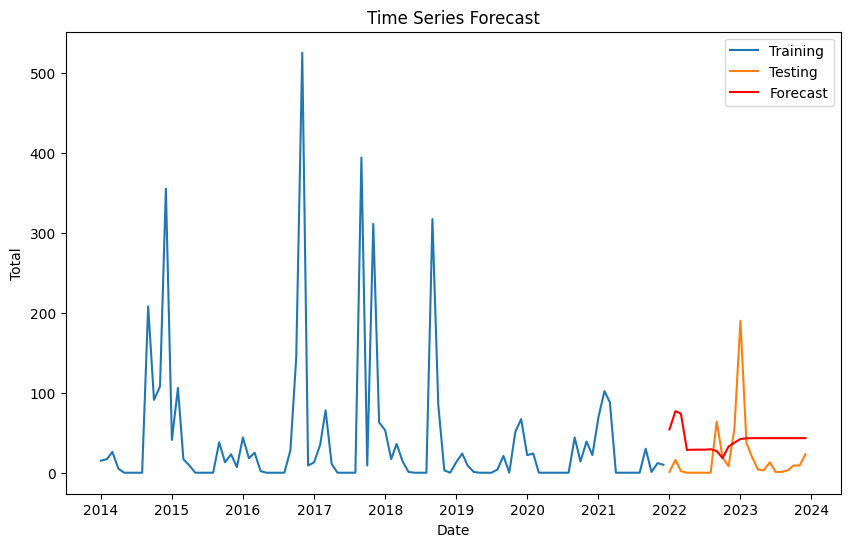

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error

data = pd.read_csv('data_summary.csv', parse_dates=['Date'], index_col='Date')

plt.figure(figsize=(10, 6))
plt.plot(data)
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Total')
plt.show()

train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

seasonal_period = 12 
model = auto_arima(train, seasonal=True, m=seasonal_period, trace=True, error_action='ignore', suppress_warnings=True)

print(model.summary())

n_periods = len(test)
forecast = model.predict(n_periods=n_periods)
forecast_index = pd.date_range(start=test.index[0], periods=n_periods, freq='MS')
forecast_series = pd.Series(forecast, index=forecast_index)

mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

plt.figure(figsize=(10, 6))
plt.plot(train, label='Training')
plt.plot(test, label='Testing')
plt.plot(forecast_series, label='Forecast', color='red')
plt.title('Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Total')
plt.legend()
plt.show()

---------------------------------------------------------------------------------------------------------------- 

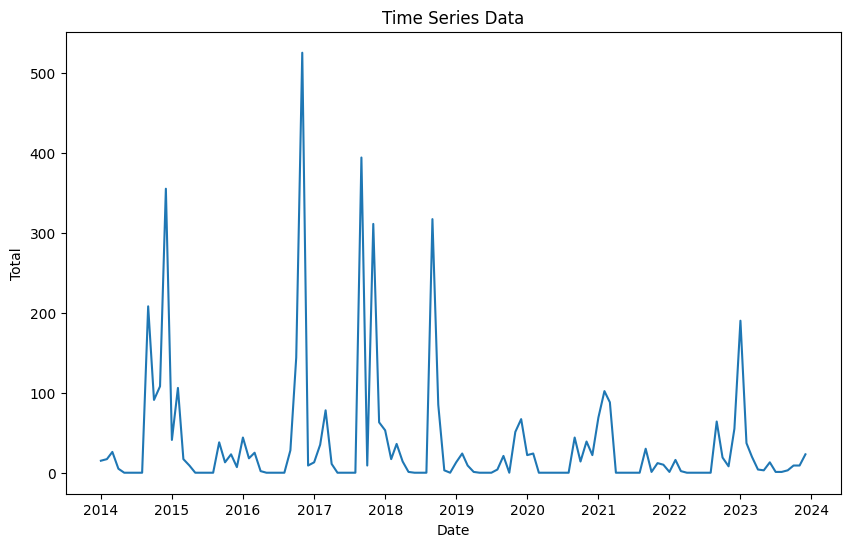

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=1132.195, Time=0.47 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1137.505, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1129.576, Time=0.16 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1126.361, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1154.500, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=1138.259, Time=0.05 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=1127.290, Time=0.26 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=1127.607, Time=0.33 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=1129.786, Time=0.10 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=1129.222, Time=0.53 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=1127.397, Time=0.09 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=1127.811, Time=0.19 sec
 ARIMA(0,0,2)(0,0,1)[12] intercept   : AIC=1127.913, Time=0.18 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=1125.996, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0

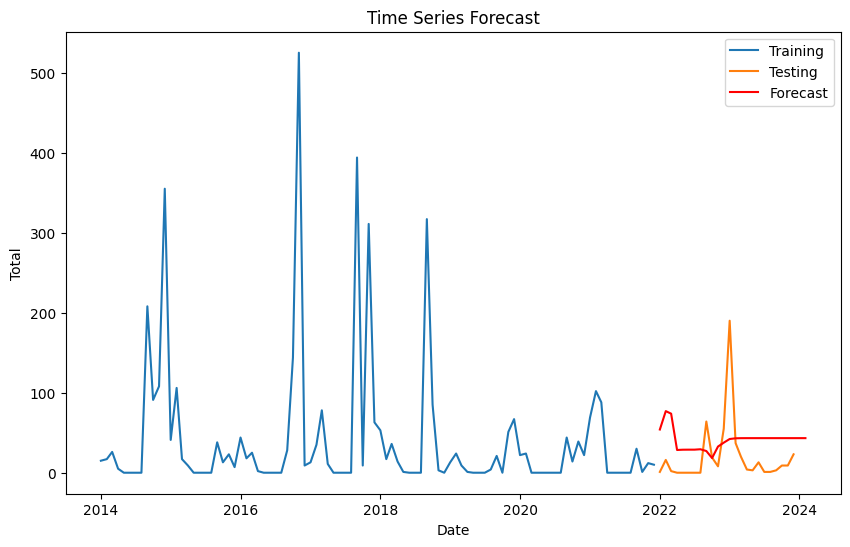

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error

data = pd.read_csv('data_summary.csv', parse_dates=['Date'], index_col='Date')

plt.figure(figsize=(10, 6))
plt.plot(data)
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Total')
plt.show()

train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

seasonal_period = 12 
model = auto_arima(train, seasonal=True, m=seasonal_period, trace=True, error_action='ignore', suppress_warnings=True)

print(model.summary())

n_periods = len(test) + 2
forecast = model.predict(n_periods=n_periods)
forecast_index = pd.date_range(start=test.index[0], periods=n_periods, freq='MS')
forecast_series = pd.Series(forecast, index=forecast_index)

test_forecast = forecast_series[:len(test)]
mae = mean_absolute_error(test, test_forecast)
mse = mean_squared_error(test, test_forecast)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

plt.figure(figsize=(10, 6))
plt.plot(train, label='Training')
plt.plot(test, label='Testing')
plt.plot(forecast_series, label='Forecast', color='red')
plt.title('Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Total')
plt.legend()
plt.show()